In [1]:
import os
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
gkey = os.environ.get("google_maps_key")

## Pulling top 50 trending videos on youtube ##

In [10]:
# all_videos_url = f"https://www.googleapis.com/youtube/v3/videos?key={gkey}&maxResults=50&chart=mostPopular&regionCode=US&part=statistics,snippet"
# all_response = requests.get(all_videos_url).json()

all_vid_list = all_response["items"]
all_vid_cat_list = []

for vid in all_vid_list:
    vid_category = vid["snippet"]["categoryId"]
    all_vid_cat_list.append(vid_category)

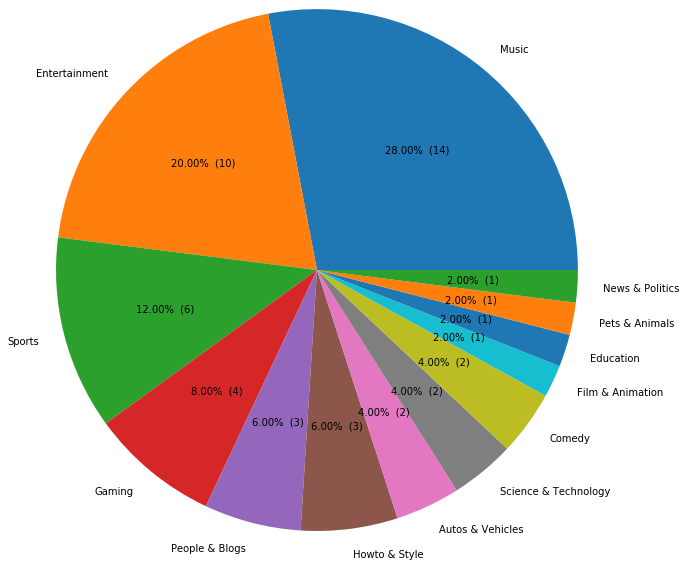

In [24]:
category_series = pd.Series(all_vid_cat_list)
pie_values = category_series.value_counts()

pie_labels = ["Music", "Entertainment", "Sports", "Gaming", "People & Blogs", "Howto & Style", "Autos & Vehicles",
              "Science & Technology", "Comedy", "Film & Animation", "Education", "Pets & Animals", "News & Politics"]

def make_autopct(pie_values):
    def my_autopct(pct):
        total = sum(pie_values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(pie_values, labels=pie_labels, autopct= make_autopct(pie_values), radius=3)
plt.show()

## Pulling top 50 trending music videos and their statistics ##

In [77]:
# music_videos_url = f"https://www.googleapis.com/youtube/v3/videos?key={gkey}&maxResults=50&chart=mostPopular&videoCategoryId=10&regionCode=US&part=statistics,snippet"
# response = requests.get(music_videos_url).json()

vid_list = response["items"]
vid_title_list = []
vid_viewcount_list = []
vid_likecount_list = []
vid_dislikecount_list = []
vid_commentcount_list = []
vid_release_date_list = []

for vid in vid_list:
    
    vid_title = vid["snippet"]["title"]
    vid_viewcount = vid["statistics"]["viewCount"]
    vid_likecount = vid["statistics"]["likeCount"]
    vid_dislikecount = vid["statistics"]["dislikeCount"]
    vid_commentcount= vid["statistics"]["commentCount"]
    vid_release_date = vid["snippet"]["publishedAt"]
    
    vid_title_list.append(vid_title)
    vid_viewcount_list.append(vid_viewcount)
    vid_likecount_list.append(vid_likecount)
    vid_dislikecount_list.append(vid_dislikecount)
    vid_commentcount_list.append(vid_commentcount)
    vid_release_date_list.append(vid_release_date)

In [93]:
music_videos_df = pd.DataFrame({"Name":vid_title_list, "View count": vid_viewcount_list, 
                                "Like count": vid_likecount_list, "Dislike count": vid_dislikecount_list,
                               "Comment count": vid_commentcount_list, "Release Date": vid_release_date_list})

music_videos_df["Release Date"] = music_videos_df["Release Date"].str.slice(start = 5, stop=10)

music_videos_df["View count"] = music_videos_df["View count"].astype("int")
music_videos_df["Like count"] = music_videos_df["Like count"].astype("int")
music_videos_df["Dislike count"] = music_videos_df["Dislike count"].astype("int")
music_videos_df["Comment count"] = music_videos_df["Comment count"].astype("int")
music_videos_df.head()

,Name,View count,Like count,Dislike count,Comment count,Release Date
0,Billie Eilish - my future,6918608,1425698,18812,153783,07-30
1,Taylor Swift - cardigan (Official Music Video),35208631,1561587,38030,104692,07-24
2,Mulatto - Muwop (Official Video) ft. Gucci Mane,1384370,79214,3565,4080,07-30
3,"Jack Harlow - WHATS POPPIN feat. Dababy, Tory ...",23629100,685257,12669,33971,07-17
4,YoungBoy Never Broke Again - One Shot feat. Li...,1532173,71350,1608,4374,07-30


In [87]:
pd.options.display.float_format = "{:,.0f}".format
music_videos_df.describe()

,View count,Like count,Dislike count,Comment count
count,50,50,50,50
mean,"6,667,203","301,660","7,062","19,474"
std,"9,374,515","394,047","11,594","28,883"
min,"313,201","14,413",424,414
25%,"1,306,722","73,029","1,149","3,781"
50%,"2,428,544","145,896","3,400","9,232"
75%,"6,857,135","377,580","6,880","22,880"
max,"37,501,966","1,644,531","57,520","153,783"


#### In the above statistic summary, we see that the standard deviation is larger than the mean for every variable. This indicates that the data is spread out and not clustered around the mean. 

#### This makes sense considering that the top 50 music videos varely greatly in popularity - some have much higher view counts because they have been trending for a longer period of time, while a newly released video might be going viral (and therefore be in the top 50 trending), but still have a low view count. For example, Billie Eilish's newly released "My Future" compared to Taylor Swift's "Cardigan".

### Grouping by Release Date

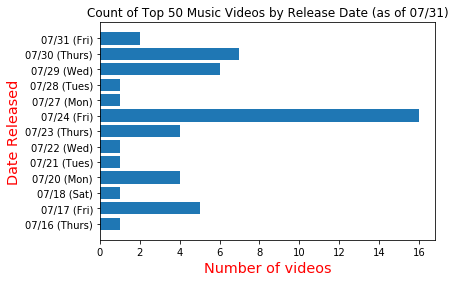

In [137]:
release_date_counts = music_videos_df.groupby(music_videos_df["Release Date"])["Name"].count()
plt.barh(release_date_counts.index, release_date_counts.values)
plt.yticks(ticks= release_date_counts.index, labels=["07/16 (Thurs)", "07/17 (Fri)", "07/18 (Sat)", "07/20 (Mon)", 
                                                     "07/21 (Tues)", "07/22 (Wed)", "07/23 (Thurs)", "07/24 (Fri)", 
                                                     "07/27 (Mon)", "07/28 (Tues)", "07/29 (Wed)", "07/30 (Thurs)",
                                                     "07/31 (Fri)"])
plt.title("Count of Top 50 Music Videos by Release Date (as of 07/31)")
plt.xlabel("Number of videos", color = "red", fontsize = "x-large")
plt.ylabel("Date Released", color = "red", fontsize = "x-large")
plt.show()

In [136]:
release_date_means = music_videos_df.groupby(music_videos_df["Release Date"]).mean().sort_values(by="View count", 
                                                                                                 ascending = False)
release_date_means

,View count,Like count,Dislike count,Comment count
Release Date,,,,
07-23,"17,415,614","492,947","16,169","31,407"
07-16,"13,162,136","384,120","7,470","30,566"
07-17,"10,903,763","335,231","9,271","17,420"
07-24,"7,569,925","293,490","8,026","15,312"
07-20,"7,091,196","304,432","6,038","19,499"
07-18,"7,035,734","647,261","15,130","31,668"
07-22,"6,390,274","372,221","5,557","17,053"
07-30,"2,269,676","329,606","4,677","31,291"
07-29,"1,951,159","176,867","3,515","14,711"


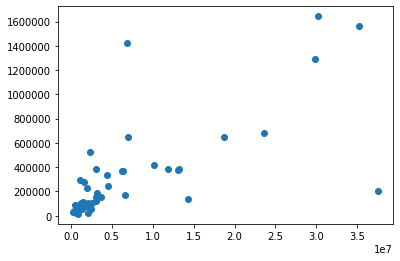

In [28]:
plt.scatter(music_videos_df["View count"], music_videos_df["Like count"])
plt.show()

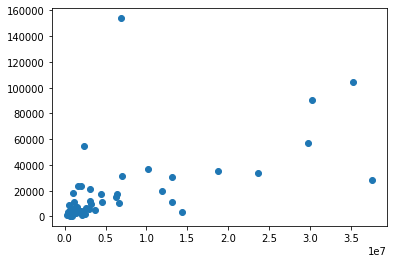

In [29]:
plt.scatter(music_videos_df["View count"], music_videos_df["Comment count"])
plt.show()

C:\Users\flurp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\flurp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31070 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\flurp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\flurp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\flurp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45576 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\flurp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45572 missing from c

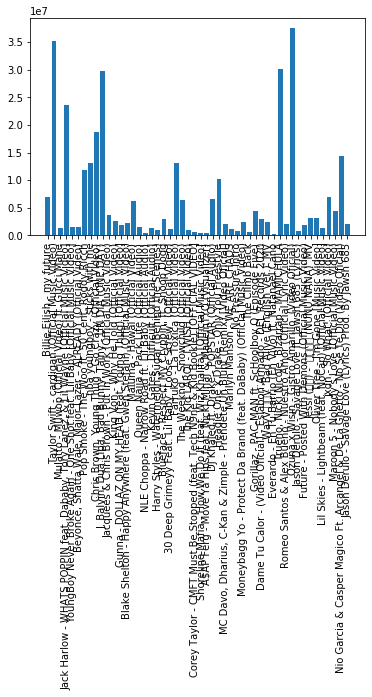

In [30]:
plt.bar(music_videos_df["Name"], music_videos_df["View count"])
plt.xticks(rotation = 90)
plt.show()